In [42]:
import pandas as pd
from sklearn. preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt




In [43]:
df1 = pd.read_csv(r"../data/winequality-red.csv",decimal=",",delimiter=";")
df2 = pd.read_csv(r"../data/winequality-white.csv",decimal=",",delimiter=";")
df1.insert (loc= len(df1.columns) , column='color', value=6)
df2.insert (loc= len(df2.columns) , column='color', value=7)
data = pd.concat([df1, df2], axis = 0,ignore_index = True)
data['fixed acidity'] = data['fixed acidity'].astype(float)
data['volatile acidity'] = data['volatile acidity'].astype(float)
data['citric acid'] = data['citric acid'].astype(float)
data['residual sugar'] = data['residual sugar'].astype(float)
data['chlorides'] = data['chlorides'].astype(float)
data['free sulfur dioxide'] = data['free sulfur dioxide'].astype(float)
data['total sulfur dioxide'] = data['total sulfur dioxide'].astype(float)
data['density'] = data['density'].astype(float)
data['pH'] = data['pH'].astype(float)
data['sulphates'] = data['sulphates'].astype(float)
data['alcohol'] = data['alcohol'].astype(float)
data.drop_duplicates(inplace=True)
data.duplicated().sum()
outlier=x = data.drop(["color", "quality"], axis=1)
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3 - Q1
data_f = outlier[~((outlier < (Q1 - 1.5 * IQR)) | (outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
index_list = list(data_f.index.values)
data_f = data[data.index.isin(index_list)]
datareg=data_f

y_reg = data["quality"]
x_reg = data.drop("quality", axis=1)
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_reg, y_reg, test_size=0.2)


In [44]:
data=pd.read_csv("../data/weatherAUS.csv")
data.dropna(inplace=True,ignore_index=True)
f = lambda x : str(x)[5:7]
data['Date'] = data['Date'].transform(f)
data['Date'] = data['Date'].astype(int)
f = lambda x : 0 if (x == "No") else 1
data['RainToday'] = data['RainToday'].transform(f)
data['RainToday'] = data['RainToday'].astype(int)

data['RainTomorrow'] = data['RainTomorrow'].transform(f)
data['RainTomorrow'] = data['RainTomorrow'].astype(int)
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical_encoder = OneHotEncoder(sparse_output=False)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('cat', categorical_encoder, categorical_features)
     ])
# Получите закодированные функции в виде DataFrame.
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(data)
encoded_features.head()
data=data.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1)
df = pd.concat([
    data,
    encoded_features
], axis=1)
df_major_0 = df[df["RainTomorrow"] == 0]
df_minor_1 = df[df["RainTomorrow"] == 1]

df_major_0_undersampled = df_major_0.sample(len(df_minor_1))

dataclass = pd.concat([df_major_0_undersampled, df_minor_1], axis=0)

x_class=dataclass.drop(['RainTomorrow'],axis=1)
y_class=dataclass['RainTomorrow']

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_class, y_class, test_size=0.33)


## Дерево классификации

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
#param_grid = {
#    "max_depth": range(2,7),
#    "min_samples_split": range(2, 5),
#    "criterion": ['gini', 'entropy', 'log_loss']
#}

#gridseach = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
#gridseach.fit(x_train_c, y_train_c)
#gridseach.best_params_

# >>> {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}

In [47]:
DTC=DecisionTreeClassifier(criterion ='entropy', max_depth = 3, min_samples_split=2)
DTC.fit(x_train_c, y_train_c)
y_pred_c=DTC.predict(x_test_c)


In [48]:
print(tree.export_text(DTC))

|--- feature_5 <= 8.65
|   |--- feature_10 <= 72.50
|   |   |--- feature_12 <= 1014.05
|   |   |   |--- class: 1
|   |   |--- feature_12 >  1014.05
|   |   |   |--- class: 0
|   |--- feature_10 >  72.50
|   |   |--- feature_10 <= 81.50
|   |   |   |--- class: 1
|   |   |--- feature_10 >  81.50
|   |   |   |--- class: 1
|--- feature_5 >  8.65
|   |--- feature_10 <= 54.50
|   |   |--- feature_14 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_14 >  1.50
|   |   |   |--- class: 0
|   |--- feature_10 >  54.50
|   |   |--- feature_6 <= 47.00
|   |   |   |--- class: 0
|   |   |--- feature_6 >  47.00
|   |   |   |--- class: 1



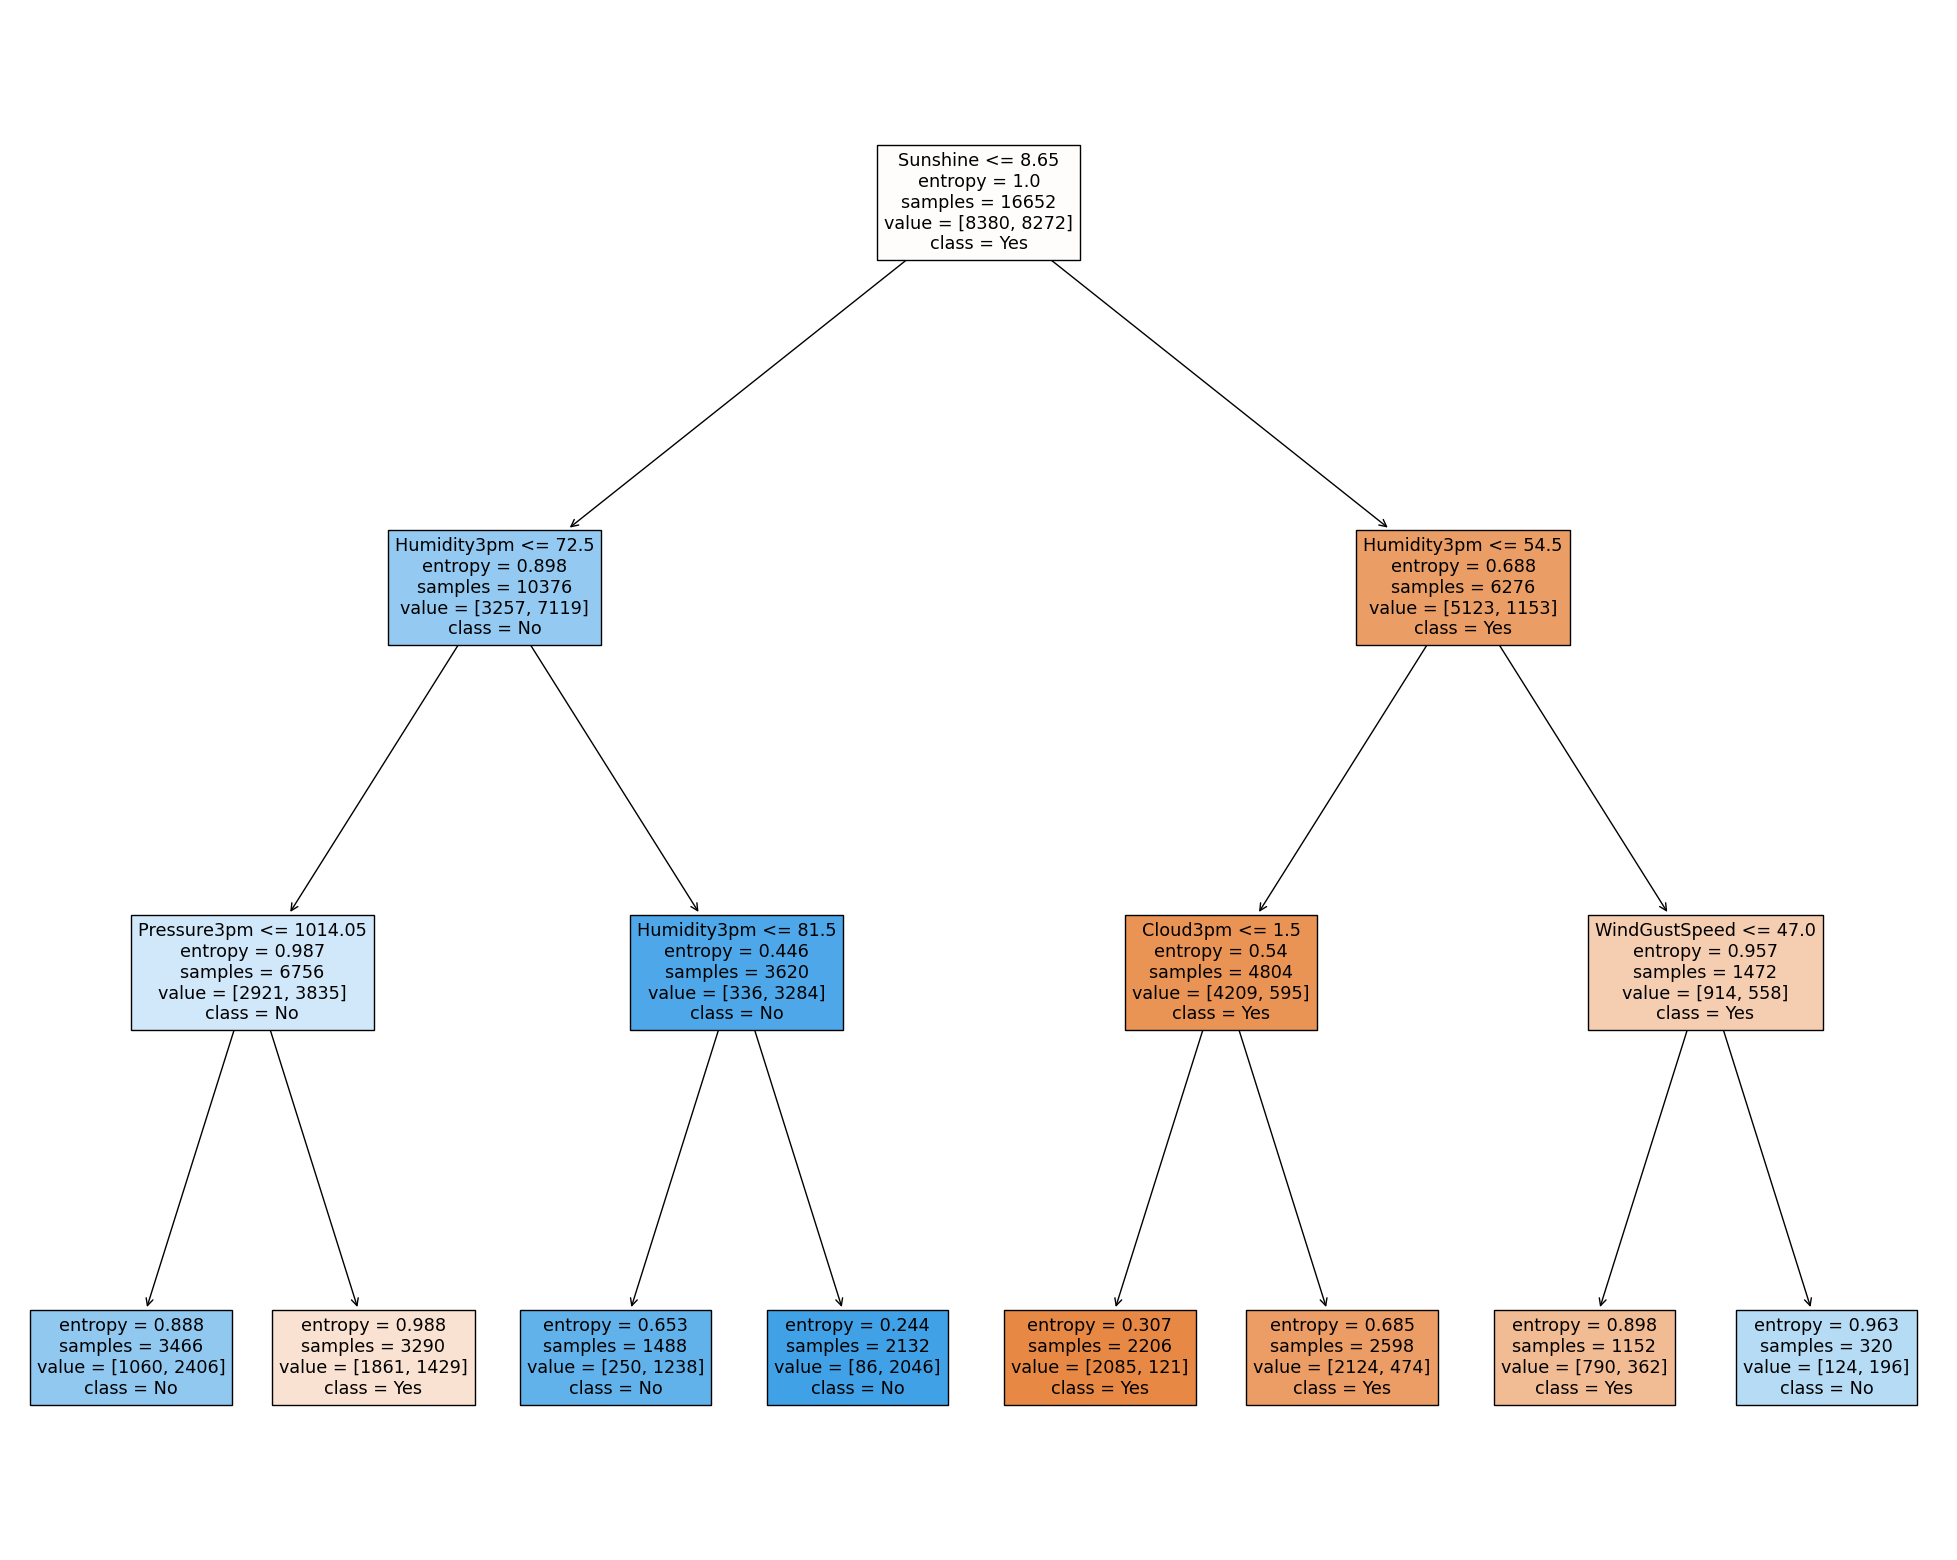

In [49]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTC,feature_names=x_class.columns.values.tolist (),class_names=["Yes", "No"] , filled=True)

In [50]:
print(classification_report(y_test_c, y_pred_c))

              precision    recall  f1-score   support

           0       0.72      0.81      0.77      4047
           1       0.79      0.69      0.74      4155

    accuracy                           0.75      8202
   macro avg       0.76      0.75      0.75      8202
weighted avg       0.76      0.75      0.75      8202



## Дерево регрессии

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
#param_grid = {
#    "max_depth": range(2,7),
#    "min_samples_split": range(2, 5),
#    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'puisson']
#}
#
#gridseach = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, scoring ='r2')
#gridseach.fit(x_train_r, y_train_r)
#gridseach.best_params_

# >>> {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_split': 4}

In [53]:
DTR=DecisionTreeRegressor(criterion='friedman_mse', max_depth=5 , min_samples_split=4)
DTR.fit(x_train_r, y_train_r)
y_pred_r=DTR.predict(x_test_r)

In [54]:
print(tree.export_text(DTR))

|--- feature_10 <= 10.99
|   |--- feature_1 <= 0.25
|   |   |--- feature_10 <= 10.12
|   |   |   |--- feature_1 <= 0.20
|   |   |   |   |--- feature_3 <= 10.15
|   |   |   |   |   |--- value: [5.72]
|   |   |   |   |--- feature_3 >  10.15
|   |   |   |   |   |--- value: [6.21]
|   |   |   |--- feature_1 >  0.20
|   |   |   |   |--- feature_10 <= 8.30
|   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- feature_10 >  8.30
|   |   |   |   |   |--- value: [5.58]
|   |   |--- feature_10 >  10.12
|   |   |   |--- feature_9 <= 0.53
|   |   |   |   |--- feature_3 <= 0.85
|   |   |   |   |   |--- value: [4.80]
|   |   |   |   |--- feature_3 >  0.85
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- feature_9 >  0.53
|   |   |   |   |--- feature_2 <= 0.51
|   |   |   |   |   |--- value: [6.29]
|   |   |   |   |--- feature_2 >  0.51
|   |   |   |   |   |--- value: [5.20]
|   |--- feature_1 >  0.25
|   |   |--- feature_10 <= 9.85
|   |   |   |--- feature_1 <= 0.42
|   |   |   |   |---

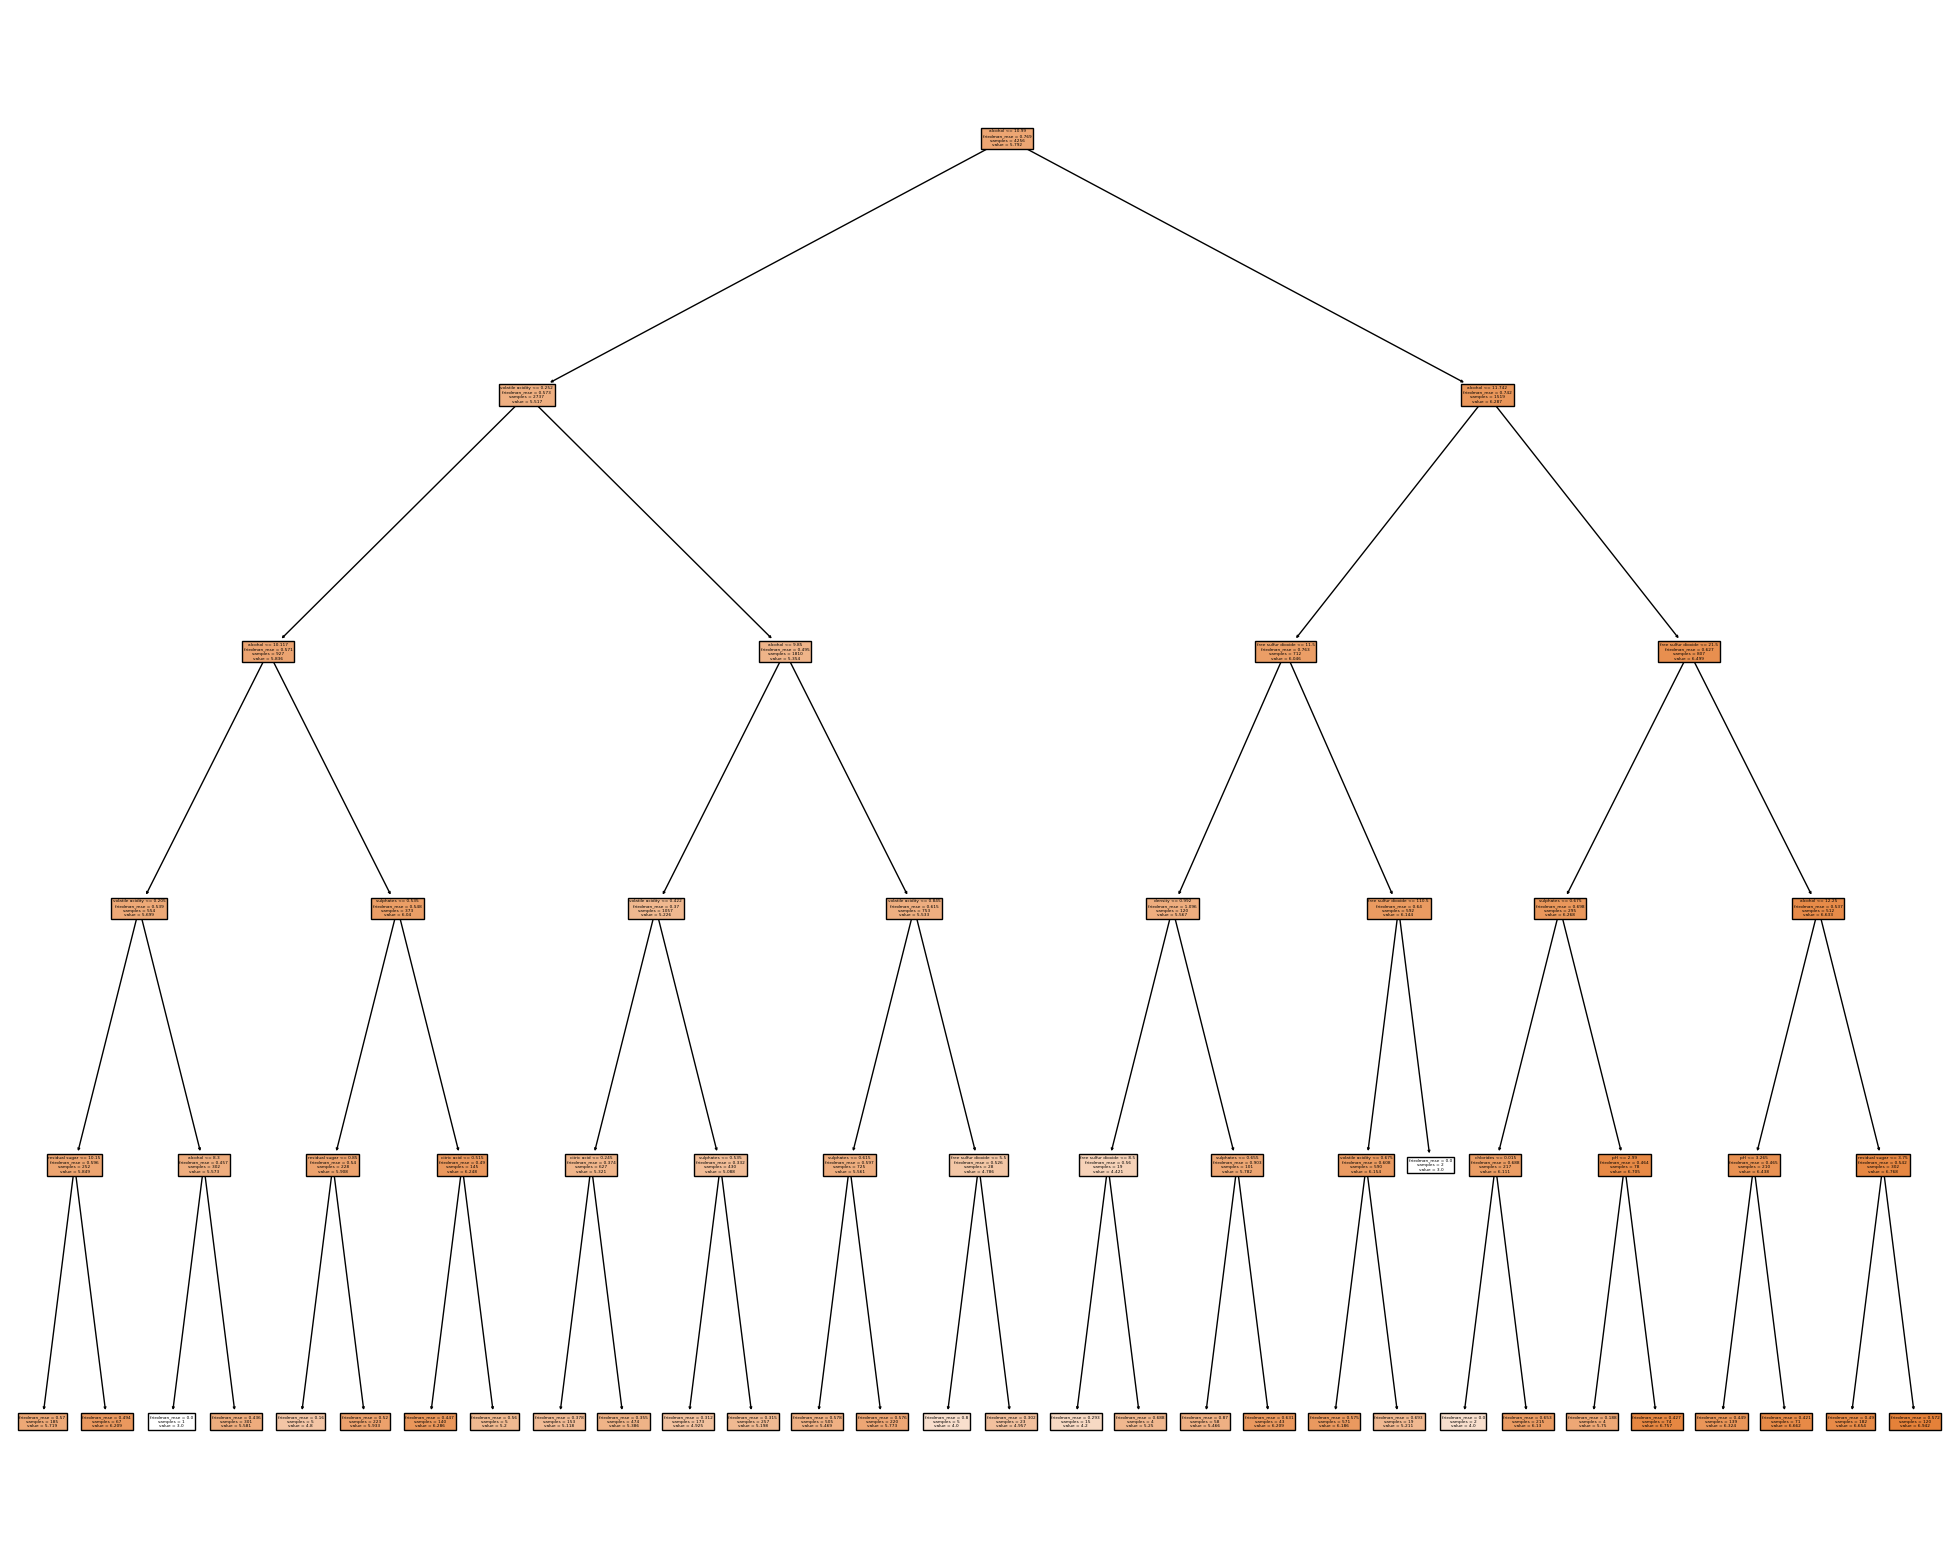

In [55]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTR, feature_names=x_reg.columns.values.tolist (), filled=True)

In [56]:
print(f'MAE: {mean_absolute_error(y_test_r, y_pred_r)}')
print(f'MSE: {mean_squared_error(y_test_r, y_pred_r)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_r, y_pred_r))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_r, y_pred_r)}')
print(f'R^2: {DTR.score(x_test_r, y_test_r)}')

MAE: 0.6056343386872426
MSE: 0.6138825484392909
RMSE: 0.7835065720460109
MAPE: 0.1076470074367233
R^2: 0.22520942140717548


## Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier().fit(x_train_c, y_train_c)

y_pred = bag_clf.predict(x_test_c)

print(classification_report(y_test_c, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      4047
           1       0.82      0.74      0.78      4155

    accuracy                           0.79      8202
   macro avg       0.79      0.79      0.79      8202
weighted avg       0.79      0.79      0.79      8202



In [117]:
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor().fit(x_train_r, y_train_r)

y_pred_r = bag_reg.predict(x_test_r)

print(f'MAE: {mean_absolute_error(y_test_r, y_pred_r)}')
print(f'MSE: {mean_squared_error(y_test_r, y_pred_r)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_r, y_pred_r))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_r, y_pred_r)}')
print(f'R^2: {bag_reg.score(x_test_r, y_test_r)}')

MAE: 0.5692669172932331
MSE: 0.5536372180451127
RMSE: 0.7440680197704459
MAPE: 0.10140511248358992
R^2: 0.30124597679108744


## GradientBoosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

grad_clf = GradientBoostingClassifier().fit(x_train_c, y_train_c)

y_pred_c = grad_clf.predict(x_test_c)

print(classification_report(y_test_c, y_pred_c))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4047
           1       0.81      0.80      0.80      4155

    accuracy                           0.80      8202
   macro avg       0.80      0.80      0.80      8202
weighted avg       0.80      0.80      0.80      8202



In [60]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor().fit(x_train_r, y_train_r)

y_pred_r = grad_reg.predict(x_test_r)

print(f'MAE: {mean_absolute_error(y_test_r, y_pred_r)}')
print(f'MSE: {mean_squared_error(y_test_r, y_pred_r)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_r, y_pred_r))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_r, y_pred_r)}')
print(f'R^2: {grad_reg.score(x_test_r, y_test_r)}')

MAE: 0.562813266457431
MSE: 0.5345720332580584
RMSE: 0.7311443313450897
MAPE: 0.09979204514367977
R^2: 0.3253084388853358


## Stacking

In [123]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier


stack_clf = StackingClassifier(estimators=[('en', DecisionTreeClassifier(criterion='entropy')),
                                        ('gini', DecisionTreeClassifier(criterion='gini'))],
                                        final_estimator=KNeighborsClassifier(10)).fit(x_train_c, y_train_c)

y_pred_c = stack_clf.predict(x_test_c)

print(classification_report(y_test_c, y_pred_c))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      4047
           1       0.75      0.73      0.74      4155

    accuracy                           0.74      8202
   macro avg       0.74      0.74      0.74      8202
weighted avg       0.74      0.74      0.74      8202



In [133]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

stack_clf = StackingRegressor(estimators=[('en', DecisionTreeRegressor(max_depth=3)),
                                          ('lin_reg', LinearRegression())],
                               final_estimator=LinearRegression()).fit(x_train_r, y_train_r)

y_pred_r = stack_clf.predict(x_test_r)

print(f'MAE: {mean_absolute_error(y_test_r, y_pred_r)}')
print(f'MSE: {mean_squared_error(y_test_r, y_pred_r)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_r, y_pred_r))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_r, y_pred_r)}')
print(f'R^2: {stack_clf.score(x_test_r, y_test_r)}')

MAE: 0.5867855686520463
MSE: 0.5817596172641036
RMSE: 0.7627316810413106
MAPE: 0.10434884313725641
R^2: 0.26575226546520647


## XGBoost

In [168]:
from catboost import CatBoostClassifier

Cat= CatBoostClassifier()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = Cat.grid_search(grid,
                                       X=x_train_c,
                                       y=y_train_c,)



0:	learn: 0.6781110	test: 0.6780518	best: 0.6780518 (0)	total: 33.7ms	remaining: 33.6s
1:	learn: 0.6647013	test: 0.6645421	best: 0.6645421 (1)	total: 41.9ms	remaining: 20.9s
2:	learn: 0.6519658	test: 0.6517468	best: 0.6517468 (2)	total: 49ms	remaining: 16.3s
3:	learn: 0.6410910	test: 0.6407744	best: 0.6407744 (3)	total: 57.4ms	remaining: 14.3s
4:	learn: 0.6289587	test: 0.6285978	best: 0.6285978 (4)	total: 65.2ms	remaining: 13s
5:	learn: 0.6194618	test: 0.6190219	best: 0.6190219 (5)	total: 73.1ms	remaining: 12.1s
6:	learn: 0.6096594	test: 0.6095309	best: 0.6095309 (6)	total: 81.3ms	remaining: 11.5s
7:	learn: 0.6009593	test: 0.6008315	best: 0.6008315 (7)	total: 88.7ms	remaining: 11s
8:	learn: 0.5922022	test: 0.5917533	best: 0.5917533 (8)	total: 95.8ms	remaining: 10.6s
9:	learn: 0.5842842	test: 0.5839082	best: 0.5839082 (9)	total: 104ms	remaining: 10.3s
10:	learn: 0.5775324	test: 0.5772099	best: 0.5772099 (10)	total: 112ms	remaining: 10.1s
11:	learn: 0.5704284	test: 0.5700782	best: 0.5700

In [170]:
y_pred_c=Cat.predict(x_test_c)
print(classification_report(y_test_c, y_pred_c))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4047
           1       0.81      0.81      0.81      4155

    accuracy                           0.81      8202
   macro avg       0.81      0.81      0.81      8202
weighted avg       0.81      0.81      0.81      8202



In [174]:
from catboost import CatBoostRegressor

Cat_reg = CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = Cat_reg.grid_search(grid,
                                       X=x_train_r,
                                       y=y_train_r,)

0:	learn: 5.6999406	test: 5.6289693	best: 5.6289693 (0)	total: 2.57ms	remaining: 2.57s
1:	learn: 5.5332577	test: 5.4621687	best: 5.4621687 (1)	total: 3.96ms	remaining: 1.97s
2:	learn: 5.3718929	test: 5.3006012	best: 5.3006012 (2)	total: 5.26ms	remaining: 1.75s
3:	learn: 5.2150418	test: 5.1440875	best: 5.1440875 (3)	total: 6.63ms	remaining: 1.65s
4:	learn: 5.0628424	test: 4.9921157	best: 4.9921157 (4)	total: 7.98ms	remaining: 1.59s
5:	learn: 4.9156557	test: 4.8447071	best: 4.8447071 (5)	total: 9.3ms	remaining: 1.54s
6:	learn: 4.7723563	test: 4.7018725	best: 4.7018725 (6)	total: 10.4ms	remaining: 1.48s
7:	learn: 4.6335512	test: 4.5632414	best: 4.5632414 (7)	total: 11.8ms	remaining: 1.46s
8:	learn: 4.4994556	test: 4.4292103	best: 4.4292103 (8)	total: 13.3ms	remaining: 1.46s
9:	learn: 4.3696938	test: 4.2992481	best: 4.2992481 (9)	total: 14.6ms	remaining: 1.44s
10:	learn: 4.2433773	test: 4.1730678	best: 4.1730678 (10)	total: 15.9ms	remaining: 1.43s
11:	learn: 4.1208651	test: 4.0505696	best:

In [184]:
y_pred_r=Cat_reg.predict(x_test_r)

print(f'MAE: {mean_absolute_error(y_test_r, y_pred_r)}')
print(f'MSE: {mean_squared_error(y_test_r, y_pred_r)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_r, y_pred_r))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_r, y_pred_r)}')
print(f'R^2: {Cat_reg.score(x_test_r, y_test_r)}')

MAE: 0.5501983690799918
MSE: 0.5104639036032508
RMSE: 0.7144675665159691
MAPE: 0.09745238803906543
R^2: 0.3557356790333531
